In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

The image size for all the frames was 704x1248 during inferencing

Yolov8 DeepOCSORT Tracking

In [2]:
df = pd.read_csv("TestVid2_deepocsort.csv")
df

,num,x,y,h,w
0,0,718,426,13,11
1,1,719,429,14,14
2,2,720,432,15,14
3,3,722,438,14,13
4,4,723,442,16,15
...,...,...,...,...,...
90,90,1015,425,16,16
91,91,1024,430,14,15
92,92,1031,435,16,16
93,93,1040,440,16,16


In [3]:
df2 = pd.read_csv('GroundTruth.csv', sep=',', delimiter=None)
df2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,710,418,15,14,left002001.png,1280,720
1,ball,715,419,16,15,left002002.png,1280,720
2,ball,716,422,15,14,left002003.png,1280,720
3,ball,717,423,15,15,left002004.png,1280,720
4,ball,720,428,15,14,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
95,ball,1015,428,16,13,left002096.png,1280,720
96,ball,1026,430,16,15,left002097.png,1280,720
97,ball,1033,435,17,17,left002098.png,1280,720
98,ball,1043,441,16,14,left002099.png,1280,720


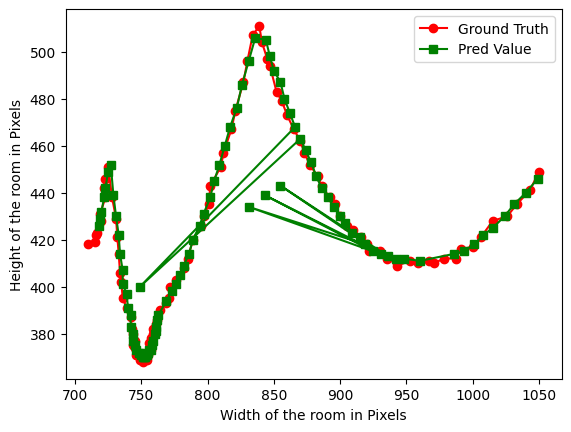

In [4]:
x1 = df2['bbox_x']
y1 = df2['bbox_y']
x2 = df['x']
y2 = df['y']

from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x2, y2, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [5]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x2,y2))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [6]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]

error = avg_displacement_error(predicted_coordinates, ground_coordinates)
print(error)


23.736676605772765


In [7]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)


In [8]:
error = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print(error)


0.7075611410542334


Yolov8 Stronsort

In [9]:
df3 = pd.read_csv("TestVid2_strongsort.csv")
df3

,x,y,h,w
0,744,377,13,13
1,744,374,14,14
2,745,372,14,14
3,747,371,13,14
4,748,371,14,13
...,...,...,...,...
59,1015,425,15,15
60,1023,429,15,16
61,1031,435,15,15
62,1039,439,17,17


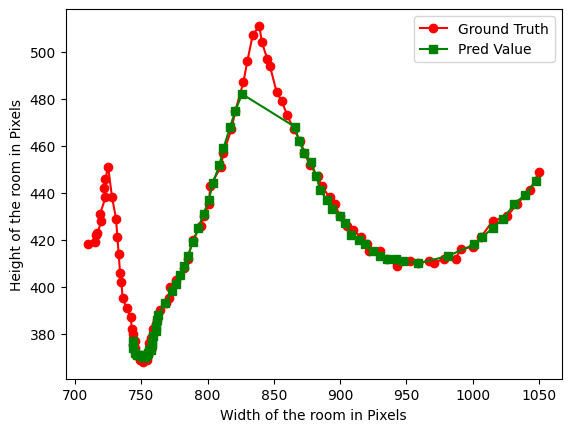

In [10]:
x3=df3['x']
y3 = df3['y']
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x3, y3, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [11]:
count = 0
for i in range(len(x1)):
    predicted_coordinates2 = list(zip(x3,y3))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [12]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]

error = avg_displacement_error(predicted_coordinates2, ground_coordinates)
print(error)


100.59208982498524


In [13]:
error = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates)
print(error)


2.8563307693159654


yolov8 ocsort Tracking

In [14]:
df4 = pd.read_csv("img1248\TestVid2_ocsort.csv")
df4

,xmin,ymin,width,height
0,718,426,13,11
1,719,429,14,14
2,720,432,15,14
3,722,438,14,13
4,723,442,16,15
...,...,...,...,...
70,1015,425,16,16
71,1024,430,14,15
72,1031,435,16,16
73,1040,440,16,16


In [15]:
x4 = df4['xmin']
y4 = df4['ymin']
count = 0
for i in range(len(x1)):
    predicted_coordinates3 = list(zip(x4,y4))
    ground_coordinates = list(zip(x1,y1))
    count += 1

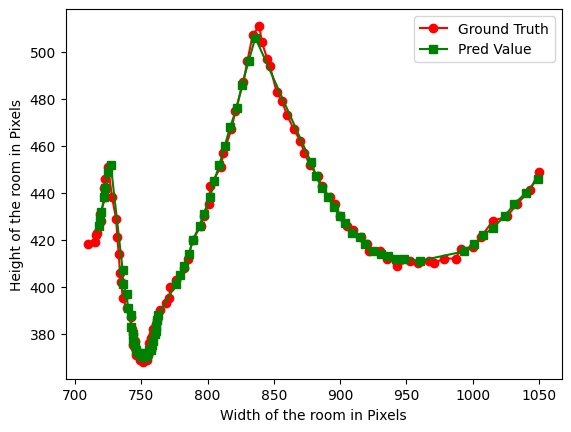

In [16]:
#plot the df4 coordinates along with the ground truth coordinates
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x4, y4, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [17]:
error4 = avg_displacement_error(predicted_coordinates3, ground_coordinates)
error5 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates)
print('ADE for ocsort is:', error4, 'and AMD for ocsort is:', error5)

ADE for ocsort is 60.970147036527486 and AMD for ocsort is 1.813511614596996


yolov8 ByteTrack 

In [18]:
df5 = pd.read_csv("img1248\TestVid2_bytetrack.csv")
df5

,xmin,ymin,width,height
0,718.000,426.000,13.00000,11.00000
1,716.707,428.603,16.02810,13.60330
2,717.932,431.191,16.52890,14.06500
3,720.057,436.473,15.76110,13.45360
4,743.600,380.600,13.00000,13.00000
5,743.908,377.825,13.77080,13.77080
6,744.767,375.377,13.27730,13.27730
7,745.801,373.158,13.07610,13.07610
8,746.883,371.806,12.96570,13.01080
9,749.274,371.436,12.29420,12.28110


In [19]:
x5 = df5['xmin']
y5 = df5['ymin']
count = 0
for i in range(len(x1)):
    predicted_coordinates4 = list(zip(x5,y5))
    ground_coordinates = list(zip(x1,y1))
    count += 1

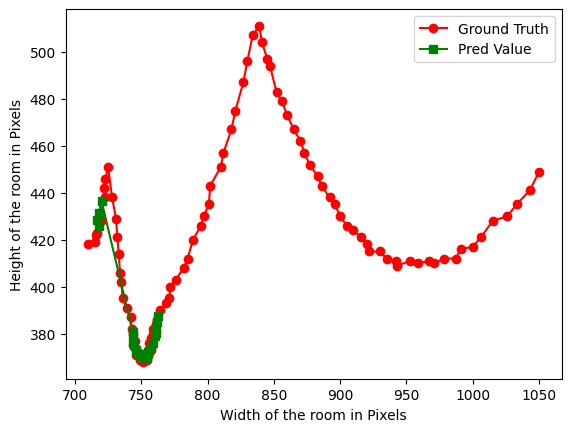

In [20]:
#plot the df5 coordinates along with the ground truth coordinates
from matplotlib import markers 
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x5, y5, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [21]:
error6 = avg_displacement_error(predicted_coordinates4, ground_coordinates)
error7 = avg_mahalanobis_distance(predicted_coordinates4, ground_coordinates)
print('ADE for bytetrack is:', error6, 'and AMD for bytetrack is:', error7)

ADE for bytetrack is: 37.50397857527765 and AMD for bytetrack is: 2.6553415548645094


yolov8 BotSORT

In [23]:
df6 = pd.read_csv("img1248\TestVid2_botsort.csv")
x6 = df6['xmin']
y6 = df6['ymin']
count = 0
for i in range(len(x1)):
    predicted_coordinates5 = list(zip(x6,y6))
    ground_coordinates = list(zip(x1,y1))
    count += 1

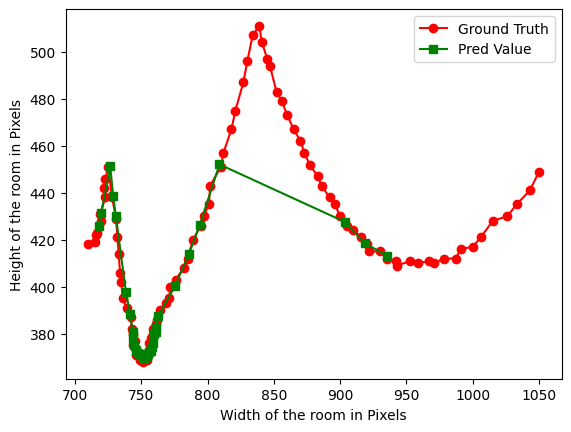

In [24]:
#plot the df6 coordinates along with the ground truth coordinates
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x6, y6, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [25]:
error8 = avg_displacement_error(predicted_coordinates5, ground_coordinates)
error9 = avg_mahalanobis_distance(predicted_coordinates5, ground_coordinates)
print('ADE for botsort is:', error8, 'and AMD for botsort is:', error9)

ADE for botsort is: 48.28700430541669 and AMD for botsort is: 1.7842545464548163
